In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_science_hindex.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [5]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test, predictions))


Coefficients: 
 [  1.68671357e-03   4.26174857e-04   6.58272826e-03  -3.66727579e-03
   9.55987157e-03   6.80348081e-04  -9.43533638e-06   1.02418817e-04
   4.25184742e-05   2.22856326e-04   3.63368986e-04   2.91660305e-05
  -4.70676828e-05  -5.99786066e-06   3.84740306e-03  -1.55225782e-03
  -4.30895049e-01   2.68498375e-01  -6.39903586e+01  -1.12243205e+01
  -3.71811017e+03   4.59541197e+03   1.57122047e-01   1.66056738e-01
   9.88612097e-05   3.05044765e-05  -1.67388422e-01   1.30967159e-01
   4.74774718e+01  -1.07808604e+00   1.55001146e-01   4.07302053e-01
  -2.48618929e-02  -5.87902756e-03  -7.81991769e-03]
Mean squared error: 0.01
Variance score: 0.73


In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.73722843  0.73541197  0.72707777  0.74350539]


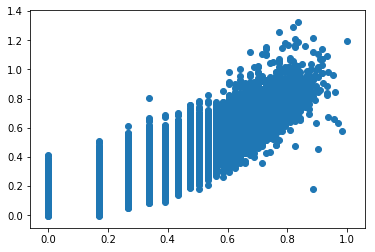

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.736157073269


In [9]:
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % metrics.mean_squared_error(y, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y, predictions))


Coefficients: 
 [  1.68671357e-03   4.26174857e-04   6.58272826e-03  -3.66727579e-03
   9.55987157e-03   6.80348081e-04  -9.43533638e-06   1.02418817e-04
   4.25184742e-05   2.22856326e-04   3.63368986e-04   2.91660305e-05
  -4.70676828e-05  -5.99786066e-06   3.84740306e-03  -1.55225782e-03
  -4.30895049e-01   2.68498375e-01  -6.39903586e+01  -1.12243205e+01
  -3.71811017e+03   4.59541197e+03   1.57122047e-01   1.66056738e-01
   9.88612097e-05   3.05044765e-05  -1.67388422e-01   1.30967159e-01
   4.74774718e+01  -1.07808604e+00   1.55001146e-01   4.07302053e-01
  -2.48618929e-02  -5.87902756e-03  -7.81991769e-03]
Mean squared error: 0.01
Variance score: 0.74
